# Описание проекта

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

# Оглавление

1. [Шаг 1. Изучение общей информации](#step1)  
2. [Шаг 2. Подготовка данных](#step2)  
3. [Шаг 3. Анализ данных](#step3)  
4. [Шаг 4. Выводы и презентация](#step4)  

# Шаг 1. Изучение общей информации  <a id="step1"></a>

In [68]:
# импорт библиотеки Pandas
import pandas as pd
# импорт библиотеки numpy
import numpy as np
# импорт библиотеки matplotlib
import matplotlib.pyplot as plt
# импорт библиотеки seaborn
import seaborn as sns
# импорт библиотеки stats
import scipy.stats as stats
# импорт библиотеки numpy
import numpy as np
# импорт библиотеки re
import re
# импорт библиотеки BytesIO
from io import BytesIO
# импорт библиотеки requests
import requests
# импорт библиотеки warnings
import warnings
# игнорирование warnings
warnings.filterwarnings('ignore')

In [69]:
# чтение файла rest_data с данными
data = pd.read_csv('/datasets/rest_data.csv') 
# вывод таблицы с данными
data.sample(5)

,id,object_name,chain,object_type,address,number
12336,194998,Шаверна по Питерски,нет,закусочная,"город Москва, Люсиновская улица, дом 36/50",0
14205,207912,Пунк питания,нет,кафе,"город Москва, Большая Черкизовская улица, дом 125",2
10705,189075,Кафе-столовая,нет,кафе,"город Москва, Старая Басманная улица, дом 20, ...",10
10933,175974,Столовая Школы № 996,нет,столовая,"город Москва, Борисовский проезд, дом 13",186
2428,20120,КАФЕ ЭКИПАЖ,нет,кафе,"город Москва, 1-я Рейсовая улица, дом 13",96


In [70]:
# вывод информации о столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


### Вывод 

В представленной таблице содержится 6 столбцов и 15366 строк:
* id — идентификатор объекта; Тип int64, оставим как есть
* object_name — название объекта общественного питания; Тип object, оставим как есть. В столбце данные представлены наименование в разных регистрах, с сокращениями, с кавычками. Нужно  
* chain — сетевой ресторан; Тип object, в столбце только два значения Да и Нет
* object_type — тип объекта общественного питания; Тип object, тип нам подходит
* address — адрес; Тип object, тип подходит. Адрес содержит в себе город, улицу, номер дома.
* number — количество посадочных мест; Тип int64, тип подходит.

В таблице нет пропущенных значений.

Название столбцов понятны, кроме столбца number, переименуем его n_seats. 

# Шаг 2. Подготовка данных  <a id="step2"></a>

Переименуем столбец number в n_seats:

In [71]:
# переименование столбца number
data.rename(columns={'number':'n_seats'}, inplace=True)
# вывод названий столбцов
data.columns

Index(['id', 'object_name', 'chain', 'object_type', 'address', 'n_seats'], dtype='object')

Изучим данные в столбце id, посмотрим есть ли дубликаты по идентификатору объекта:

In [72]:
# подсчет количества дубликатов в столбце id
print("Количество одинаковых id в датафрейме = ", data['id'].duplicated().sum())

Количество одинаковых id в датафрейме =  0


Далее проанализируем столбец object_name, кажется там много интересного.

Изучим данные в столбце object_name, для начала приведем все значения к нижнему регистру:

In [73]:
# приведение значений столбца к нижнему регистру
data['object_name'] = data['object_name'].apply(lambda x:x.lower())
# заменим ё на е
data['object_name'] = data['object_name'].apply(lambda x:x.replace('ё','е'))
# уникальные значения
count_unique_name_before = data['object_name'].value_counts().count()
print("Количество уникальных значений в столбце object_name до обработки", count_unique_name_before)

Количество уникальных значений в столбце object_name до обработки 9919


Всего значений 15366, уникальных значений 9919, количество уменьшилось, потому что в данных есть сетевые рестораны, которые называются одинаково.

Пожалуй ещё удалим из названий заведений символы, такие как № , " ( ) - « » это поможет в будущем найти дубли, так как один и тот же ресторан может быть записан по разному, например "Кафе ДАДА" и «Кафе Да-Да».

In [74]:
# определение списка символов для поиска в поле object_name
symbols = [',', '«', '»', '(', ')', '"', '  ', '№', '-']
# удаление символов из значений столбца object_name
for s in symbols:
    data['object_name'] = data['object_name'].apply(lambda x:x.replace(s, ''))
# уникальные значения после удаоения спец.символов
count_unique_name_arter = data['object_name'].value_counts().count()  
print("Количество уникальных значений в столбце object_name после обработки уменьшилось на ", count_unique_name_before - count_unique_name_arter)

Количество уникальных значений в столбце object_name после обработки уменьшилось на  117


Отлично, количество уникальных значений в столбце object_name после обработки уменьшилось, значит предположение о разном наименовании одного и того же заведения было оправдано. 

Также в данных есть разные названия одного и того заведения, но одни с приставкой "кафе" или "столовая", а другие без этой приставки, например "Кофе с собой «Кофейня»" и "Кофе с собой" или "кафе суши вок" и "бар суши вок", очевидно слова типа объекта не дают другое заведение, скорее всего это одно и тоже сетевое заведение. Ошибка могла появиться по разным причинам, например все названия были добавлены в БД вручную разными операторами, и кто-то внес запись с приставкой, а кто-то без, кто-то назвал бар, а кто-то кафе. Давайте посмотрим сколько записей с приставками ['кафе' 'кофейня' 'закусочная' 'булочная' 'ресторан' 'кафетерий' 'буфет' 'бар' 'буфет-бар' 'паб' 'кафе-паб' 'пиццерия' 'кафе быстрого питания' 'арт-кафе' 'арт кафе' 'предприятие быстрого обслуживания'] в данных:

In [75]:
# поиск названий объектов содержащих слово "кафе"
data[data['object_name'].str.contains('кафе')].head(10)

,id,object_name,chain,object_type,address,n_seats
2,24309,кафе академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
4,119365,кафе вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
20,21950,кафе,нет,кафе,"город Москва, Алтайская улица, дом 33/7",30
21,84832,кафе уют,нет,кафе,"город Москва, Алтуфьевское шоссе, дом 14",110
24,125608,кафетерий,нет,кафетерий,"город Москва, Алтуфьевское шоссе, дом 56",6
32,70791,кафе хинкальная,нет,кафе,"город Москва, проспект Андропова, дом 26",45
71,59265,кафебар альбом,нет,кафе,"город Москва, Новая Басманная улица, дом 12, с...",80
87,20344,кафе бар бульвар,нет,бар,"город Москва, Бескудниковский бульвар, дом 40,...",60
110,24779,кафе русский водочный дом,нет,кафе,"город Москва, улица Бочкова, дом 5",30
121,138699,кафе есть хинкали пить вино,нет,кафе,"город Москва, Малая Бронная улица, дом 4",40


Интересно, что среди названий есть заведения, которые так и называются просто "кафе", если мы удалим приставки, которые выделены выше, то мы можем получить часть заведений без названия вообще, поэтому, удалим из названий все приставки, кроме тех, где название состоит из одного слова.

In [76]:
# список значений-приставок
prefix = ['кафе', 'детское кафе', 'семейное кафе', 'кофейня', 'закусочная', 'булочная', 'ресторан', \
          'кафетерий', 'буфет','бар', 'буфет-бар', 'паб', 'кафе-паб', 'пиццерия', 'кафе быстрого питания', \
          'арт-кафе','арт кафе', 'предприятие быстрого обслуживания' , \
          'столовая при', 'столовая', 'стол.' , 'кальянная']
# переименуем столбец object_name в object_name_original
data.rename(columns={'object_name':'object_name_original'}, inplace=True)
# создание нового столбца object_name
data['object_name'] = data['object_name_original']

In [77]:
# удаление приставок из названий объектов
for elem in prefix:
# добавление пробела к поиску по слову, чтобы не удалить названия состоящие из одной приставки
    pattern = '^' + elem + ' | ' + elem + '$'
    data['object_name'] = data['object_name'].apply(lambda x:re.sub(pattern, '', x))
data[{'object_name_original','object_name'}].sample(10)    

,object_name,object_name_original
8779,шаурма,шаурма
6482,суши,кафе суши бар
7670,пицца хат,закусочная пицца хат
9538,aglomerat,aglomerat
7449,шоколадница,кофейня шоколадница
13548,азия&гриль,азия&гриль
297,сайгон,ресторан сайгон
1594,rotonda,rotonda
14149,кастрюлька,столовая кастрюлька
3059,space owl,space owl


In [78]:
# проверим, что объект "Кофе с собой «Кофейня»" стал "кофе с собой"
data.query('id == 176830')

,id,object_name_original,chain,object_type,address,n_seats,object_name
12005,176830,кофе с собой кофейня,да,предприятие быстрого обслуживания,"город Москва, Чертановская улица, дом 1Г",6,кофе с собой


In [79]:
# уникальные значения после удаления приставок
count_unique_name_arter = data['object_name'].value_counts().count()  
print("Количество уникальных значений в столбце object_name после обработки уменьшилось на ", count_unique_name_before - count_unique_name_arter)

Количество уникальных значений в столбце object_name после обработки уменьшилось на  728


Как видим, мы ещё больше уменьшили количество разных названий одного и тоже объекта.

Но это ещё не всё, в данных также присутствуют одни и те же заведения написанные на латинице и на кириллице, например 'Сабвей' и 'Subway', и даже Сабвей Subway (это уже слишком 👿). Заменим такие названия на что-то одно.

In [80]:
data['object_name']= data['object_name'].replace(['сабвей','сабвей subway','сабвэй'],'subway')
data['object_name']= data['object_name'].replace(['старбакс',\
                              'кофемания starbucks',\
                              'старбакс starbucks',\
                              'старбагс', \
                              'старбакс кофе'],'starbucks')
data['object_name']= data['object_name']\
                    .replace(['баскин роббинс',\
                              'баскин роббинс & стардогс'],'baskin robbins')
data['object_name']= data['object_name']\
                    .replace(['кофешоп компани',\
                              'кофешоп coffeeshop Company'],'coffeeshop company')
data['object_name']= data['object_name']\
                    .replace(["домино'с пицца", \
                              "домино'с пицца domino,s pizza",\
                              "доминос пицца"],"dominos pizza")
data['object_name']= data['object_name'].replace('kfc волгоградский','kfc')
data['object_name']= data['object_name'].replace('коста кофе','costa coffee')
data['object_name']= data['object_name'].replace('данкин донатс','dunkin donuts')
data['object_name']= data['object_name'].replace('макдоналдс','mcdonalds')

In [81]:
# уникальные значения после удаления приставок
count_unique_name_arter = data['object_name'].value_counts().count()  
print("Количество уникальных значений в столбце object_name после обработки уменьшилось на ", count_unique_name_before - count_unique_name_arter)
print("Количество уникальных значений в столбце object_name после всех операций ", count_unique_name_arter)

Количество уникальных значений в столбце object_name после обработки уменьшилось на  745
Количество уникальных значений в столбце object_name после всех операций  9174


Ещё несколько наименований одного и того же заведения удалось унифицировать. Пожалуй, на этом закончим преобразования значений столбца object_name и перейдем к столбцу chain.

In [82]:
# уникальные значения в столбце chain
print("Уникальные значения в столбце chain", data['chain'].unique())

Уникальные значения в столбце chain ['нет' 'да']


В столбце chain предобработка не нужна, с данными всё хорошо.

In [83]:
# уникальные значения в столбце object_type
print("Уникальные значения в столбце object_type", data['object_type'].unique())

Уникальные значения в столбце object_type ['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']


In [84]:
# переименование магазин (отдел кулинарии) в кулинария
data['object_type']= data['object_type'].replace('предприятие быстрого обслуживания','фастфуд')

In [85]:
# переименование предприятие быстрого обслуживания в фастфуд
data['object_type']= data['object_type'].replace('магазин (отдел кулинарии)','кулинария')

Посчитаем сколько типов заведений приходится для каждого заведения из группы сетевых заведений:

In [86]:
# поиск типов заведений для каждого заведения
chain_grouped = data[data['chain']=='да'].groupby(['object_name','object_type'])['object_type'].count().reset_index(name='sum')
chain_grouped

,object_name,object_type,sum
0,baskin robbins,закусочная,2
1,baskin robbins,кафе,6
2,baskin robbins,фастфуд,7
3,beverly hills diner,ресторан,1
4,bierloga,кафе,1
...,...,...,...
631,ян примус,ресторан,2
632,японский ресторан вабисаби,ресторан,1
633,японской кухни макимаки,ресторан,1
634,япоша,кафе,1


Из таблицы выше видим, что есть "baskin robbins" с типом "закусочная" и типом "кафе", а "япоша" - это ресторан или кафе? или это разные заведения тезки? Эта проблема, опять таки могла появится из-за ошибки операторов и т.п.

В ходе изучения таких заведений в интернете, считаем, что у сетевых заведений, которых больше одного в данных, тип должен быть один и тот же. Будем искать среди одноименных заведений те, у которых филиалов больше одного, и брать тот тип заведения, что встречается чаще. 

In [87]:
#  функция замены типов заведений среди сетевых
def change_object_type(row):
    if row['chain']=='да':
        object_table = chain_grouped.loc[chain_grouped['object_name']==row['object_name'], ['object_type','sum']]
        result = object_table.loc[object_table['sum']==object_table['sum'].max(),'object_type'].reset_index().drop(['index'],axis=1)
        row['object_type'] = result['object_type'].loc[0]
        return ''.join(row['object_type'])
    else:
        return row['object_type']
    
data['object_type'] = data.apply(change_object_type, axis=1).reset_index().drop(['index'],axis=1)
data[data['chain']=='да'].groupby(['object_name','object_type'])['object_type'].count().reset_index(name='sum')

,object_name,object_type,sum
0,baskin robbins,фастфуд,15
1,beverly hills diner,ресторан,1
2,bierloga,кафе,1
3,black & white,кафе,1
4,bocconcino,ресторан,3
...,...,...,...
412,ямми микс,кафетерий,1
413,ян примус,ресторан,2
414,японский ресторан вабисаби,ресторан,1
415,японской кухни макимаки,ресторан,1


Привели сетевые рестораны к верному типу заведения. 

Теперь проанализируем данные в столбце количество посадочных мест n_seats, что-то мне подсказывает, что там не всё ладно)):

In [88]:
# информация по столбцу n_seats
data.n_seats.describe()

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: n_seats, dtype: float64

В среднем по всем заведениям предоставленным для анализа 59 посадочных мест, вроде неплохо, но почему-то в некоторых заведениях число мест 0. Самый вместительный объект способен разместить у себя 1700 человек.

Изучим поподробнее заведения с нулевым количеством мест:

In [89]:
data.query('n_seats == 0')

,id,object_name_original,chain,object_type,address,n_seats,object_name
137,115498,пекарня & донер,нет,закусочная,"город Москва, Бутырская улица, дом 9, корпус 2",0,пекарня & донер
154,152556,шаурма в пите,нет,фастфуд,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,шаурма в пите
157,149568,суши,нет,фастфуд,"город Москва, улица Маршала Василевского, дом ...",0,суши
190,126956,шаурма курыгриль,нет,фастфуд,"город Москва, 1-я Владимирская улица, дом 21",0,шаурма курыгриль
195,149531,шаурма курыгриль,нет,фастфуд,"город Москва, 2-я Владимирская улица, дом 44/10",0,шаурма курыгриль
...,...,...,...,...,...,...,...
15334,211228,милти,да,фастфуд,"город Москва, Дубравная улица, дом 34/29",0,милти
15335,211221,милти,да,фастфуд,"город Москва, Пятницкое шоссе, дом 3",0,милти
15336,211209,готовые блюда милти,да,фастфуд,"город Москва, Ореховый бульвар, дом 22А",0,готовые блюда милти
15337,208477,милти,да,фастфуд,"город Москва, 3-й Крутицкий переулок, дом 18",0,милти


In [90]:
print("Количество нулевых мест в датафрейме = ",data.query('n_seats == 0')['n_seats'].count())

Количество нулевых мест в датафрейме =  1621


Видим, что среди значений есть предприятия быстрого обслуживания, вполне возможно, что у таких заведений нет посадочных мест,также как у закусочных и кафетериев, посмотрим на рестораны, у них то точно должны быть местаь:

In [91]:
data.query('n_seats == 0 and object_type == "ресторан"').sample(10)

,id,object_name_original,chain,object_type,address,n_seats,object_name
8494,152879,shvilli реторан швили,нет,ресторан,"город Москва, поселение Сосенское, Калужское ш...",0,shvilli реторан швили
15252,222677,чайхона 1,да,ресторан,"город Москва, Мячковский бульвар, дом 3А",0,чайхона 1
12899,200576,мартиросян м.г.,нет,ресторан,"город Москва, Профсоюзная улица, дом 61А",0,мартиросян м.г.
4503,152224,фудмаркет. рогачикова,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0,фудмаркет. рогачикова
14967,210764,дейли шеф,нет,ресторан,"город Москва, город Московский, улица Хабарова...",0,дейли шеф
4492,152305,фудмаркет. шапиро,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0,фудмаркет. шапиро
11602,177047,ресторан суши make,нет,ресторан,"город Москва, Автозаводская улица, дом 18",0,суши make
12897,200572,гришаев в.в,нет,ресторан,"город Москва, Профсоюзная улица, дом 61А",0,гришаев в.в
10821,182757,голдпицца,нет,ресторан,"город Москва, Карамышевская набережная, дом 56...",0,голдпицца
12898,200573,дамаскина к.а,нет,ресторан,"город Москва, Профсоюзная улица, дом 61А",0,дамаскина к.а


Очень странно, что среди ресторанов нашлись такие, у которых посадочных мест нет. Смекается мне, что тут тоже ошибка сбора данных. Мы можем избавиться от данных, но тогда потеряем информацию по заведениям фастфуда, можем найти количество мест в интернете и заполнить нули, но это огромный пласт работы, времени на который нет. Поэтому, ничего с такими данными делать не будем, но в дальнейшем анализе будем учитывать этот нюанс.

Посмотрим на заведение, у которого рекордно большое количество мест = 1700:

In [92]:
data.query('n_seats == 1700')

,id,object_name_original,chain,object_type,address,n_seats,object_name
12723,199696,arena by soho family,нет,бар,"город Москва, Кутузовский проспект, дом 36, ст...",1700,arena by soho family


По информации в интернете "arena by soho family" огромная площадка для выступления звезд, мест там действительно много, около 4000. 

Осталось обработать столбец address с адресом заведения, по данным видно, что в столбце информация представлена в однообразном виде. Я бы предложила найти по адресу в геокодере координаты, даже если адрес написан по разному, например "проспект Строителей" и "Строителей проспект" мы бы нашли одни и те же координаты, в таком случае поиск дубликатов (одних и тех же заведений расположенных по одному адресу) был бы более точный, но к сожалению, получить доступн бесплатно не предвидится возможным https://prnt.sc/10rddvl

Поэтому, не будем изменять столбец с адресом и поищем дубликаты так как есть. При поиске дубликатов не будем учитывать столбец id(так как выше определили, что id у всех заведений разные) и столбец object_name_original, так как все преобразования названий объектов общественного питания мы сделали в столбце object_name.

То есть посчитаем количество дубликатов в датафрейме, учитывая столбцы object_name, chain, object_type, address, n_seats.

In [93]:
count_dublicate = data[['object_name', 'chain', 'object_type', 'address', 'n_seats']].duplicated().sum()
print("Количество дубликатов в датафрейме =", count_dublicate)

Количество дубликатов в датафрейме = 87


In [94]:
# удаление дубликов в датафрейме
data = data[['object_name', 'chain', 'object_type', 'address', 'n_seats']].drop_duplicates().reset_index(drop = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15279 entries, 0 to 15278
Data columns (total 5 columns):
object_name    15279 non-null object
chain          15279 non-null object
object_type    15279 non-null object
address        15279 non-null object
n_seats        15279 non-null int64
dtypes: int64(1), object(4)
memory usage: 597.0+ KB


### Вывод

В ходе проведенной предорботки данных было сделано:
* переименован столбец number в n_seats
* проализирован столбец id, дуликатов не найдено
* проализирован столбец object_name. Найдено много проблем, заменили ё на ё, убрали спецсимволы, убрали названия типов объектов, таких как "кафе", привели к одному названию одни и те же рестораны записанные по разному(кириллица, латиница). В ходе предобработки уменьшили количество дубликатов на 745
* проализирован столбец chain предобработка не была нужна, с данными всё хорошо
* проанализирован столбец object_type. Поменян тип у сетевых заведений, так как некоторые филиалы одного и того же заведения имели разные типы
* проанализирован столбец n_seats. Обнаружены нулевые данные по количеству мест, которые пока было решено оставить без изменения
* удалены дубликаты.

# Шаг 3. Анализ данных  <a id="step3"></a>

### Исследуем соотношение видов объектов общественного питания по количеству. 

In [95]:
# сгруппируем данные по типу объекта и посчитаем количество
type_grouped = data.groupby('object_type')['object_type'].count().sort_values(ascending=False).reset_index(name='n_objects')
type_grouped

,object_type,n_objects
0,кафе,6146
1,столовая,2580
2,ресторан,2157
3,фастфуд,2103
4,бар,848
5,буфет,567
6,кафетерий,353
7,закусочная,301
8,кулинария,224


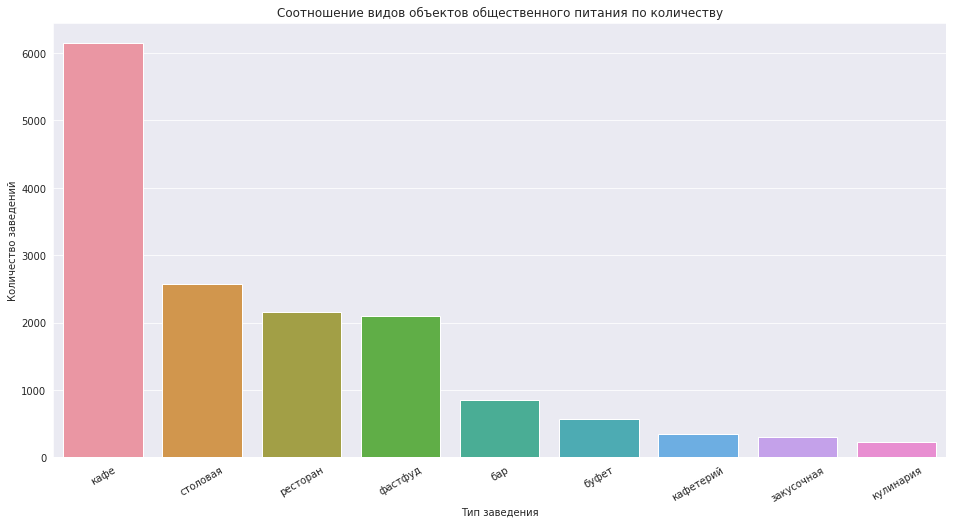

In [96]:
# построение графика 
plt.figure(figsize=(16,8))
sns.set_palette('rainbow') 
sns.set_style("darkgrid")
sns.barplot(x='object_type', y='n_objects', data=type_grouped)
# установим заголовок для графика
plt.title('Соотношение видов объектов общественного питания по количеству')
# подпишем оси координат обозначив единицы измерения
plt.xlabel('Тип заведения')
plt.ylabel('Количество заведений')
plt.xticks(rotation=30)
plt.show()

Первое место по типам заведений в Москве занимает объекты типа "кафе" - 6146, последнее место - "кафетерий", "закусочная", "кулинария". Количество "столовых", "фастфудов" и "ресторанов" схожее - чуть более 2000. Баров меньше 1000.

### Исследуем соотношение сетевых и несетевых заведений по количеству.

In [97]:
# расчет количества сетевых и несетевых заведений
chain_grouped = data.groupby('chain')['chain'].count().sort_values(ascending=False).reset_index(name='n_objects')
chain_grouped

,chain,n_objects
0,нет,12316
1,да,2963


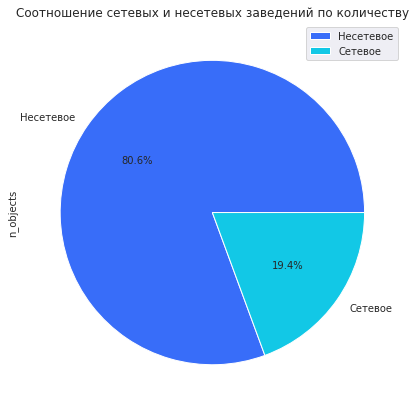

In [98]:
x_order = ['Несетевое', 'Сетевое']
# построение графика 
chain_grouped.plot.pie(y='n_objects', labels=x_order, autopct='%1.1f%%',figsize=(7,7))
# установим заголовок для графика
plt.title('Соотношение сетевых и несетевых заведений по количеству')
plt.show()

Несетевых заведений значительно больше, они составляют 80.6% от общего числа заведений. 

### Для какого вида объекта общественного питания характерно сетевое распространение?

In [99]:
# расчет типа заведения общественного питания по признаку сетевой или несетевой
chain_type_grouped = data.groupby(['object_type','chain'])['chain'].count().reset_index(name='n_objects')
chain_type_grouped

,object_type,chain,n_objects
0,бар,да,30
1,бар,нет,818
2,буфет,да,2
3,буфет,нет,565
4,закусочная,да,9
5,закусочная,нет,292
6,кафе,да,1471
7,кафе,нет,4675
8,кафетерий,да,10
9,кафетерий,нет,343


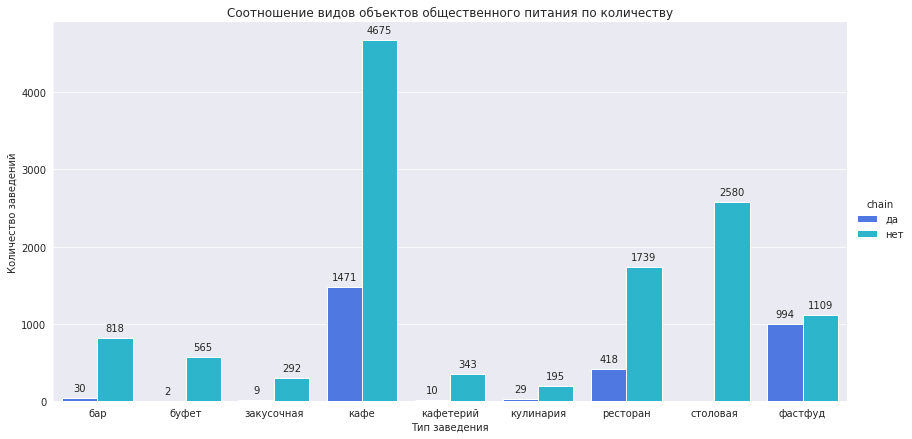

In [100]:
# построение графика 
g = sns.catplot(
            kind="bar", data=chain_type_grouped,  x='object_type', y='n_objects', hue="chain", \
            height=6, aspect=2\
            )
# установим заголовок для графика
plt.title('Соотношение видов объектов общественного питания по количеству')
# подпишем оси координат обозначив единицы измерения
plt.xlabel('Тип заведения')
plt.ylabel('Количество заведений')
# добавление меток значений к столбцу
for ax in g.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

На графике видно, что столовые имеют только несетевой тип. В кафетериях, закусочных, кулинариях и буфетах очень маленькая доля сетевых заведений. В других объектах общественного питания есть как сетевые, так и несетевые заведения. В таких типах заведениях как фастфуд, ресторан, кафе количество несетевых заведений превышает количество сетевых. Максимальная разница между количеством сетевых и несетевых заведений для типа кафе - 3204, а также в кафе больше всего несетевых объектов по сравнению с другими типами. Также можно заметить, что почти на каждую точку фастфуда приходится сетевое фастфуд заведение.

Сетевое распространение характерно для таких объектов общественного питания как кафе и фастфуды.

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

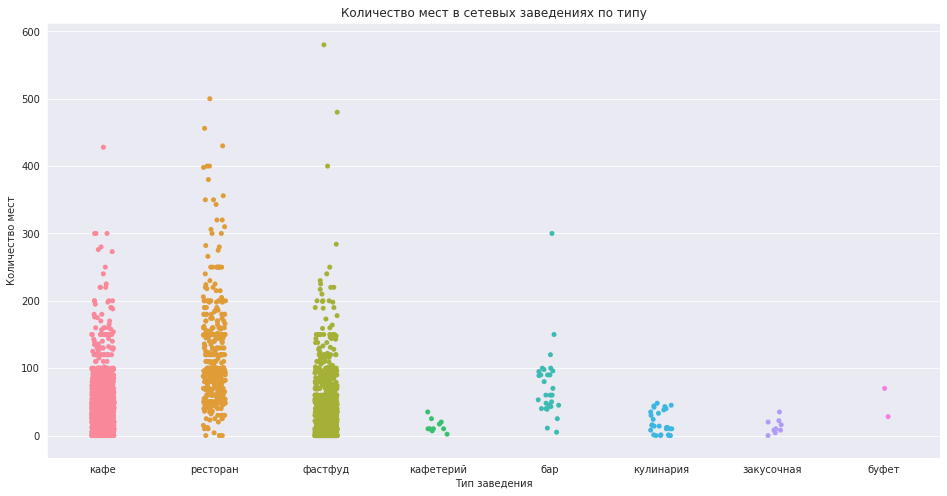

In [101]:
# построение графика 
plt.figure(figsize=(16,8))
sns.stripplot(x = 'object_type', y = 'n_seats', data = data[data['chain'] == 'да'])
# установим заголовок для графика
plt.title('Количество мест в сетевых заведениях по типу')
# подпишем оси координат обозначив единицы измерения
plt.xlabel('Тип заведения')
plt.ylabel('Количество мест')
plt.show()

Для сетевых заведений характерно большое число точек(филиалов) с небольшим количеством посадочных мест. Большое число посадочных мест (больше 100) встречается редко, за исключение ресторанов(у них в основном до 200 мест), что логично, так как рестораны по площади превосходят другие типы заведний и число посадочных мест там ожидаемо больше. 

### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? 

In [102]:
seats_type_pivot = (data
                  .pivot_table(index='object_type', values='n_seats', aggfunc='mean') 
                  .sort_values(by='n_seats', ascending = False)
                  .reset_index()
                 )
seats_type_pivot

,object_type,n_seats
0,столовая,130.312403
1,ресторан,100.200742
2,буфет,52.167549
3,бар,44.216981
4,кафе,38.978360
5,фастфуд,22.738469
6,кафетерий,8.883853
7,закусочная,6.807309
8,кулинария,6.227679


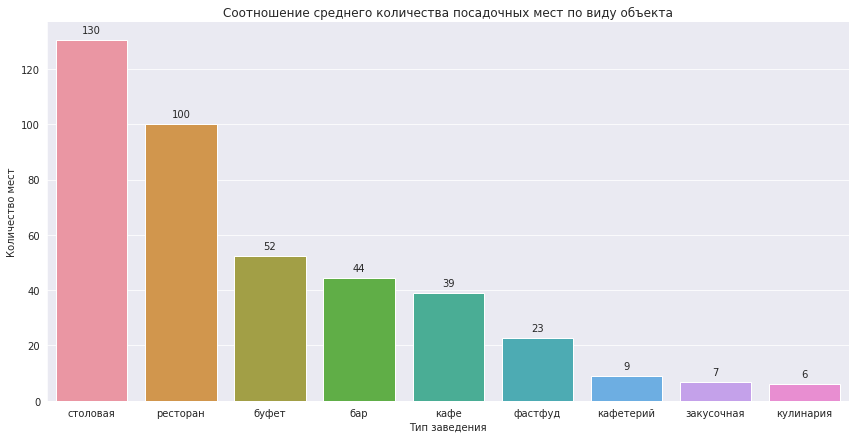

In [103]:
# построение графика 
g = sns.catplot(
            kind="bar", data=seats_type_pivot,  x='object_type', y='n_seats', \
            height=6, aspect=2\
            )
# установим заголовок для графика
plt.title('Соотношение среднего количества посадочных мест по виду объекта')
# подпишем оси координат обозначив единицы измерения
plt.xlabel('Тип заведения')
plt.ylabel('Количество мест')
# добавление меток значений к столбцу
for ax in g.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

Больше всего посадочных мест в столовых, далее идут рестораны, буфеты, бары. Меньше всего посадочных мест в кафетериях, закусочных и кулинариях.

Посмотрим изменятся ли результаты, если уберем нулевые значения количества мест из выборки.

In [104]:
seats_not_null_by_type_pivot = (data.query('n_seats > 0')
                  .pivot_table(index='object_type', values='n_seats', aggfunc='mean') 
                  .sort_values(by='n_seats', ascending = False)
                  .reset_index()
                 )
seats_not_null_by_type_pivot

,object_type,n_seats
0,столовая,131.279188
1,ресторан,101.614010
2,буфет,57.884540
3,бар,45.671133
4,кафе,41.020719
5,фастфуд,35.927122
6,закусочная,14.956204
7,кулинария,13.037383
8,кафетерий,12.202335


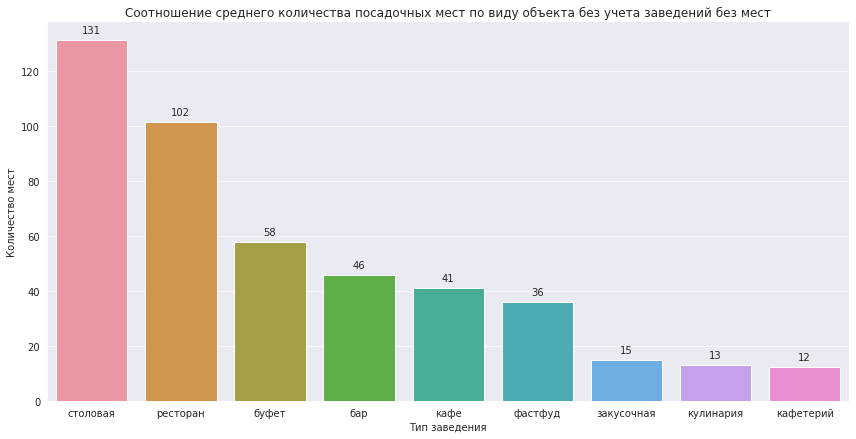

In [105]:
# построение графика 
g = sns.catplot(
            kind="bar", data=seats_not_null_by_type_pivot,  x='object_type', y='n_seats', \
            height=6, aspect=2\
            )
# установим заголовок для графика
plt.title('Соотношение среднего количества посадочных мест по виду объекта без учета заведений без мест')
# подпишем оси координат обозначив единицы измерения
plt.xlabel('Тип заведения')
plt.ylabel('Количество мест')
# добавление меток значений к столбцу
for ax in g.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

Результаты не изменились, по-прежнему больше всего посадочных мест в столовых, ресторанах, буфетах и барах.

### Выделим в отдельный столбец информацию об улице из столбца address

In [106]:
# извлечение улицы из адреса
data['street'] = data['address'].apply(lambda x: x.split(', ')[1])
data.sample(10)

,object_name,chain,object_type,address,n_seats,street
4957,манеров,нет,столовая,"город Москва, 4-й Лихачёвский переулок, дом 4",50,4-й Лихачёвский переулок
9578,султан,нет,кафе,"город Москва, Бескудниковский бульвар, дом 40,...",60,Бескудниковский бульвар
4840,в школе 1151 корп.1464 ранее школа 1149,нет,столовая,"город Москва, город Зеленоград, корпус 1464",180,город Зеленоград
1451,гринпалас,нет,ресторан,"город Москва, улица Грина, дом 15",200,улица Грина
825,хлеб насущный,да,кафе,"город Москва, улица Остоженка, дом 3/14",15,улица Остоженка
1756,else kafe,нет,кафе,"город Москва, Иваньковское шоссе, дом 5",30,Иваньковское шоссе
2281,кафе,нет,кафе,"город Москва, Нижняя Первомайская улица, дом 77",48,Нижняя Первомайская улица
13183,при курорте красная пахра,нет,ресторан,"город Москва, поселение Краснопахорское, село ...",150,поселение Краснопахорское
10900,бистро,нет,фастфуд,"город Москва, Варшавское шоссе, дом 45",0,Варшавское шоссе
1772,икура,да,кафе,"город Москва, Родионовская улица, дом 12",35,Родионовская улица


В улицы попали значения c городами, т.к. в некоторых адресах было указано "город Москва, город Московский, 3-й микрорайон, дом 12". Поскольку мы исследуем заведение общественного питания Москвы, удалим эти города из датафрейма.

In [107]:
print("Количество адресов не в городе Москва = ", data[data['street'].str.match('город')==True]['street'].count())

Количество адресов не в городе Москва =  399


In [108]:
data = data[data['street'].str.match('город')==False].reset_index()
print("Количество адресов не в городе Москва после удаления других городов = ", data[data['street'].str.match('город')==True]['street'].count())

Количество адресов не в городе Москва после удаления других городов =  0


### Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?

In [109]:
# топ-10 улиц по точкам общепита
top_streets_pivot = (data
               .pivot_table(index='street', values='object_name', aggfunc='count') 
               .sort_values(by='object_name', ascending = False)
               .reset_index()
               .head(10)
                 )
# переименование столбца
top_streets_pivot.rename(columns={'object_name':'n_object'}, inplace=True)
top_streets_pivot

,street,n_object
0,проспект Мира,203
1,Профсоюзная улица,181
2,Ленинградский проспект,170
3,Пресненская набережная,167
4,Варшавское шоссе,161
5,Ленинский проспект,147
6,поселение Сосенское,137
7,проспект Вернадского,128
8,Кутузовский проспект,114
9,Каширское шоссе,111


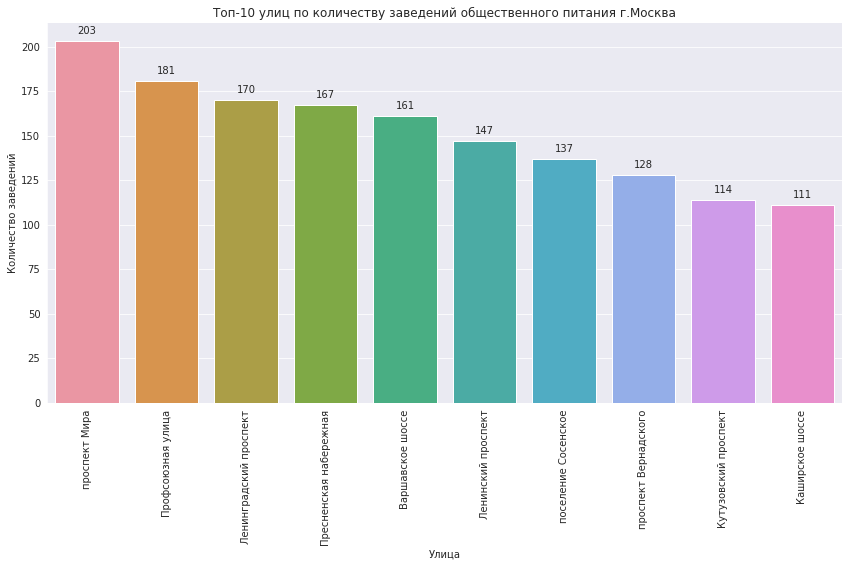

In [110]:
# построение графика 
g = sns.catplot(
            kind="bar", data=top_streets_pivot,  x='street', y='n_object', \
            height=6, aspect=2\
            )
# установим заголовок для графика
plt.title('Топ-10 улиц по количеству заведений общественного питания г.Москва')
# подпишем оси координат
plt.xlabel('Улица')
plt.ylabel('Количество заведений')
# добавление меток значений к столбцу
for ax in g.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

Больше всего объектов общественного питания расположены на проспекте Мира, что не удивительно, так как эта улица очень большая ~9км. На проспекте работают 203 объекта общественного питания. Профсоюзная улица немного уступает по количеству заведений 181, но не уступает в протяженности >9.3 км, но при этом распологается дальше от центра, чем проспект Мира.  Замыкает топ-10 Каширское шоссе с количеством заведений равным 111. Количество заведений в лидирующей десятке находятся в диапазоне от 111 до 203.

Чтобы найти районы, к которым принадлежат улицы, воспользуемся внешним источником https://hubofdata.ru/

In [111]:
# считаем информацию о районах, полученных с внешнего источника 
spreadsheet_id = '1nFJCzO03ziBfeJPICKe0sTnjA32Zt1bvy9hxp4smPg8'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
district = pd.read_csv(BytesIO(r.content))
district.sample(10)

,streetname,areaid,okrug,area
78,Малый Ржевский переулок,17,ЦАО,Пресненский район
3912,Московская Кольцевая Автодорога,134,ЮЗАО,Район Ясенево
2954,Туркменский проезд,91,СЗАО,Район Строгино
1368,2-й переулок Петра Алексеева,41,ЗАО,Можайский Район
2933,аллея Дорога Жизни,91,СЗАО,Район Строгино
3862,Нахимовский проспект,132,ЮЗАО,Район Черемушки
2751,3-й Силикатный проезд,92,СЗАО,Район Хорошево-Мневники
2067,Валдайский проезд,63,САО,Район Левобережный
4315,улица Дурова,16,ЦАО,Мещанский район
326,Горлов тупик,19,ЦАО,Тверской район


In [112]:
# добавление информации по районам города
district_with_streets_top10 = pd.merge(top_streets_pivot, district, 
                                       left_on='street', right_on='streetname')
district_with_streets_top10

,street,n_object,streetname,areaid,okrug,area
0,проспект Мира,203,проспект Мира,70,СВАО,Алексеевский район
1,проспект Мира,203,проспект Мира,86,СВАО,Ярославский Район
2,проспект Мира,203,проспект Мира,78,СВАО,Район Марьина роща
3,проспект Мира,203,проспект Мира,79,СВАО,Останкинский район
4,проспект Мира,203,проспект Мира,81,СВАО,Район Ростокино
5,проспект Мира,203,проспект Мира,82,СВАО,Район Свиблово
6,проспект Мира,203,проспект Мира,16,ЦАО,Мещанский район
7,Профсоюзная улица,181,Профсоюзная улица,123,ЮЗАО,Академический район
8,Профсоюзная улица,181,Профсоюзная улица,132,ЮЗАО,Район Черемушки
9,Профсоюзная улица,181,Профсоюзная улица,134,ЮЗАО,Район Ясенево


Посмотрим какой район встречается чаще всего:

In [113]:
# топ-10 районов
district_with_streets_top10['area'].value_counts().head(10)

Ломоносовский район           2
Район Гагаринский             2
Обручевский район             2
Донской район                 2
Район Тропарево-Никулино      2
Район Теплый Стан             2
Район Проспект Вернадского    2
Район Нагатино-Садовники      2
Район Ясенево                 1
Район Дорогомилово            1
Name: area, dtype: int64

Можно выделить 8 районов, в которые входят топ-10 улиц с наибольшим количеством общественных заведений. Это такие районы как Ломоносовский, Обручевский, Теплый Стан, Проспект Вернадского, Нагатино-Садовники, Гагаринский, Тропарево-Никулино и Донской.

### Найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?

In [114]:
# подсчет количества улиц с 1 общепитом
one_object_streets_pivot = (data
                           .pivot_table(index='street', values='object_name', aggfunc='count')
                           .query('object_name == 1')
                           .reset_index()
                          )
# переименование столбца
one_object_streets_pivot.rename(columns={'object_name':'n_object'}, inplace=True)
print("Количество улиц с одним объектом общественного питания = ", one_object_streets_pivot['n_object'].count())

Количество улиц с одним объектом общественного питания =  579


In [115]:
# добавление информации по районам города
district_with_one_object = pd.merge(one_object_streets_pivot, district, 
                                       left_on='street', right_on='streetname')
district_with_one_object.sample(10)

,street,n_object,streetname,areaid,okrug,area
451,переулок Васнецова,1,переулок Васнецова,16,ЦАО,Мещанский район
458,посёлок Акулово,1,посёлок Акулово,33,ВАО,Район Восточный
19,1-й Николощеповский переулок,1,1-й Николощеповский переулок,12,ЦАО,Район Арбат
238,Кузьминская улица,1,Кузьминская улица,113,ЮВАО,Район Кузьминки
245,Лениногорская улица,1,Лениногорская улица,28,ВАО,Район Косино-Ухтомский
107,6-я улица Лазенки,1,6-я улица Лазенки,42,ЗАО,Район Ново-Переделкино
46,2-й Боткинский проезд,1,2-й Боткинский проезд,55,САО,Район Беговой
265,Малый Конюшковский переулок,1,Малый Конюшковский переулок,17,ЦАО,Пресненский район
283,Мирской переулок,1,Мирской переулок,65,САО,Савеловский район
415,Фролов переулок,1,Фролов переулок,15,ЦАО,Красносельский район


In [116]:
# топ-10 районов
district_with_one_object['area'].value_counts().head(10)

Таганский район        27
Район Хамовники        26
Басманный район        25
Тверской район         20
Пресненский район      19
Район Марьина роща     18
Район Арбат            17
Мещанский район        16
Район Сокольники       15
Район Замоскворечье    14
Name: area, dtype: int64

Улицы с одним объектом общественного питания в основном находятся в таких районах как Таганский, Хамовники, Басманный, Тверской и другие. 

### Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

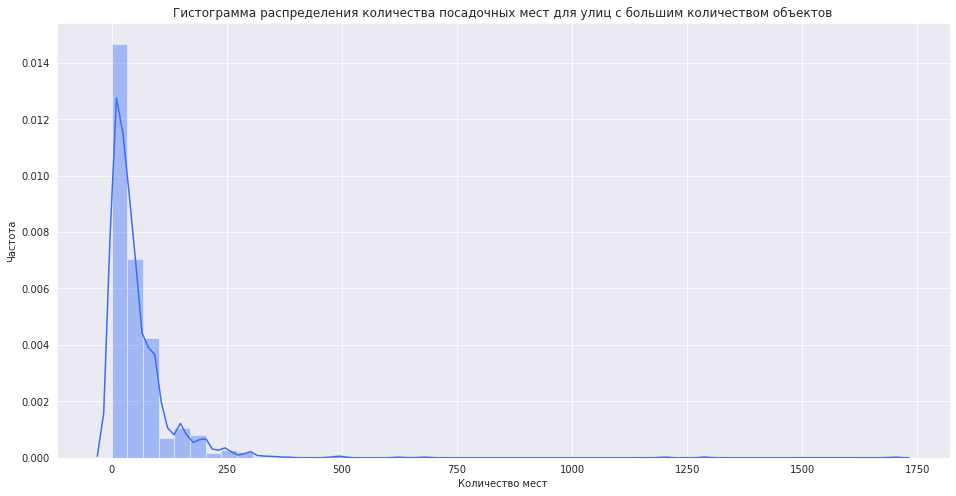

In [117]:
top_streets = top_streets_pivot['street']
data_top10_streets = data.query('street in @top_streets')
# гистограмма распределения 
plt.figure(figsize=(16,8))
ax = sns.distplot(data_top10_streets['n_seats'], bins = 50, kde=True)
# установим заголовок для графика
plt.title("Гистограмма распределения количества посадочных мест для улиц с большим количеством объектов")
# подпишем оси координат обозначив единицы измерения
plt.ylabel('Частота')
plt.xlabel('Количество мест')
plt.show()

Основая часть значений сосредоточена в диапазоне от 0 до 250 посадочных мест. Нулевые значения связаны с наличием фастфудов и кулинарий. Очень много значений до 100 посадочных мест, это говорит о том, что на топ-10 улицах много небольших заведений. Также справа наблюдаем длинный хвост, который растягивается до 1750, потому что заведение с самым большим количеством мест "arena by soho family" находится на Кутузовском проспекте, который попал в топ-10 улиц. 

Теперь посмотрим на гистограмму распределения откинув нулевое количество мест и больше 250:

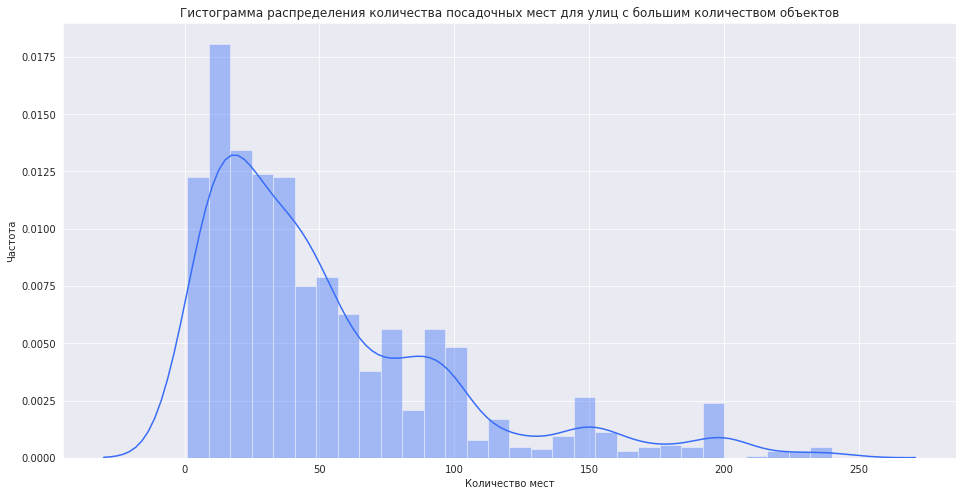

In [118]:
# гистограмма распределения 
plt.figure(figsize=(16,8))
sns.distplot(data_top10_streets.query('n_seats > 0 and n_seats < 250')['n_seats'], bins = 30, kde=True)
# установим заголовок для графика
plt.title("Гистограмма распределения количества посадочных мест для улиц с большим количеством объектов")
# подпишем оси координат обозначив единицы измерения
plt.ylabel('Частота')
plt.xlabel('Количество мест')
plt.show()

Большинство заведений, находящихся на топ-10 улицах, имеют от 0 до 40 посадочных мест. Около 200 точек общепита имеют 10 посадочных мест.

### Выводы

В ходе проведенного анализа получили следующие результаты:
1) Лидирующее место в Москве занимают кафе. На втором месте - столовые, фастфуды и рестораны. А бары, буфеты, кафетерии и кулинарии являются наименее распространёнными видами общественного питания.

2) Несетевых заведений значительно больше. Столовые имеют только несетевой тип. В таких типах заведениях как фастфуд, ресторан, кафе количество несетевых заведений превышает количество сетевых. Почти на каждую точку фастфуда приходится сетевое фастфуд заведение. Сетевое распространение характерно для таких объектов общественного питания как кафе и фастфуды.

3) Для сетевых заведений характерно большое число точек(филиалов) с небольшим количеством посадочных мест. 

4) Наибольшее среднее количество посадочных мест в столовых и ресторанах. Меньше всего посадочных мест в кафетериях, закусочных и кулинариях.

5) Больше всего объектов общественного питания расположены на проспекте Мира, Профсоюзной улице, Ленинградском проспекте, Пресненской набережной, Варшавском шоссе	

6) Чаще всего заведения встречаются в таких районах как Ломоносовский, Обручевский, Теплый Стан, Проспект Вернадского, Нагатино-Садовники, Гагаринский, Тропарево-Никулино и Донской.

7) Улицы с одним объектом общественного питания в основном находятся в таких районах как Таганский, Хамовники, Басманный, Тверской и другие.

8)  На улицах с максимальных количеством заведений преобладают кафе и фастфуды, которые имеют от 10 до 40 посадочных мест.

# Шаг 4. Выводы и презентация <a id="step4"></a>

Исходя из полученных данных, можно рекомендовать для нового заведения: тип - кафе, число посадочных мест - 10-40, несетевое. Для новой точки с необычным типом обслуживания, как у нас, нет смысла делать сетевое заведение, так как формат новый и стоит его обточить. Не стоит сразу делать ресторан с большой вместимостью, ведь мы не знаем насколько хорошо взлетит новый формат, поэтому тип кафе и среднее число посадочных мест вполне уместно в данном случае. Заведение лучше открывать на улицах, расположенных внутри МКАДА, так как там высокий трафик туристов и местных жителей, но стоит учитывать, что конкурентация там тоже высокая.

Презентация : https://drive.google.com/file/d/1eVg8ehUTtFWSBWWxFo2EbSFLb6ueEB2R/view?usp=sharing